In [1]:
%pylab notebook
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd /work/PMESDR/AQUA_AMSRE/N/cubes_WesternUS
%ls

/work/PMESDR/AQUA_AMSRE/N/cubes_WesternUS
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB.bin
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB.bin.hdr
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2002.TB.nc
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.bin
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.bin.hdr
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.nc
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2004.TB.bin
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2004.TB.bin.hdr
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2004.TB.nc
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2005.TB.bin
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2005.TB.bin.hdr
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2005.TB.nc
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2006.TB.bin
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.2.2006.TB.bin.hdr
CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS

In [5]:
list = glob.glob("*nc")

In [18]:
fid.close()
fid = Dataset(list[-1], "r", "NETCDF4")

In [19]:
fid

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3
    title: MEaSUREs Calibrated Passive Microwave Daily EASE-Grid 2.0 Brightness Temperature ESDR
    product_version: v1.2
    software_version_id: 0.2.31
    software_repository: git@bitbucket.org:nsidc/measures-byu.git
    history: Wed Oct  4 17:27:51 2017: /projects/brodzik/miniconda3/envs/cetb3/bin/ncrcat -O --output=/work/PMESDR/AQUA_AMSRE/N/cubes_WesternUS/CETB.cubefile.WesternUS.AQUA_AMSRE-36H-SIR-RSS-v1.2.2004.TB.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2004.36H.SIR/WesternUS.AQUA_AMSRE-36H-SIR-RSS-v1.2.NSIDC-0630-EASE2_N3.125km-AQUA_AMSRE-2004001-36H-M-SIR-RSS-v1.2.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2004.36H.SIR/WesternUS.AQUA_AMSRE-36H-SIR-RSS-v1.2.NSIDC-0630-EASE2_N3.125km-AQUA_AMSRE-2004001-36H-E-SIR-RSS-v1.2.nc /scratch/summit/brodzik/workDir.AQUA_AMSRE.2004.36H.SIR/WesternUS.AQUA_AMSRE-36H-SIR-RSS-v1.2.NSIDC-0630-EASE2_N3.125km-AQUA_AMSRE

In [20]:
d = fid.variables["TB"][:]
d.shape

(732, 656, 808)

In [21]:
layer = d[90,:,:]
layer.shape

(656, 808)

In [10]:
import numpy as np

In [22]:
np.amin(layer), np.amax(layer)

(113.35, 299.19)

In [12]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


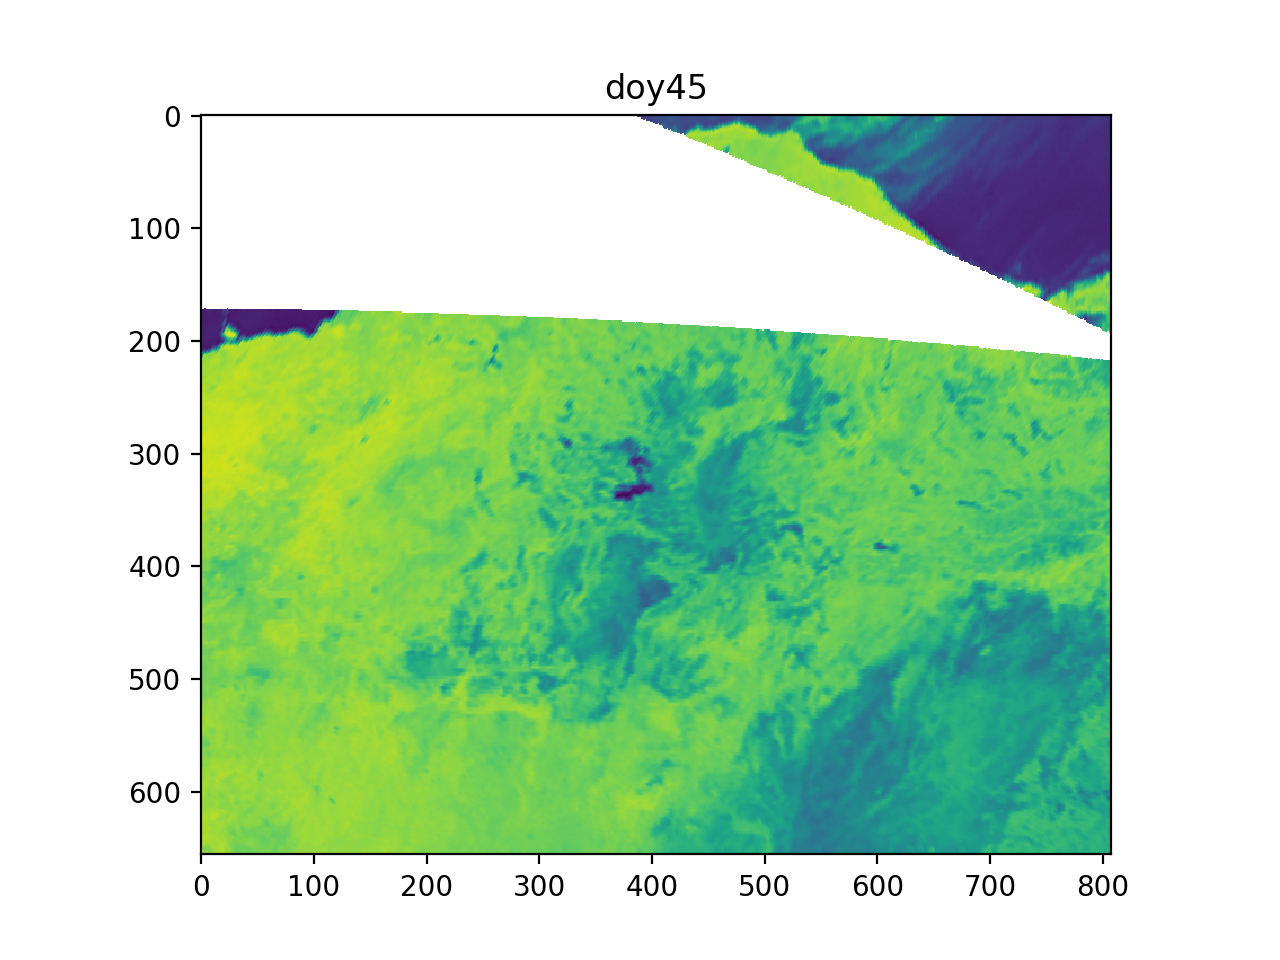

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(layer)
ax.set_title("doy45")

In [26]:
fid.variables['longitude'][:]

array([[-116.84149926, -116.85338121, -116.8652729 , ..., -130.82228949,
        -130.84719777, -130.87213112],
       [-116.81802402, -116.82989881, -116.84178334, ..., -130.79345763,
        -130.81836223, -130.84329191],
       [-116.79453905, -116.80640668, -116.81828404, ..., -130.76460071,
        -130.7895016 , -130.81442759],
       ..., 
       [ -99.65105382,  -99.65592867,  -99.6608084 , ..., -106.18770903,
        -106.20119376, -106.21470037],
       [ -99.62239924,  -99.62726016,  -99.63212596, ..., -106.14128382,
        -106.15473407, -106.16820616],
       [ -99.5937398 ,  -99.59858679,  -99.60343864, ..., -106.09483682,
        -106.10825254, -106.12169005]])